In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def cargar_datos():
    base=pd.read_csv("../files/input/shipping-data.csv")
    return base

In [3]:
def crear_visual_for_shipping_per_warehouse(base):
    base=base.copy()
    grafica=plt.figure()
    counts=base.Warehouse_block.value_counts()
    counts.plot.bar(
        title="Shipping per Warehouse",
        xlabel="Warehouse block",
        ylabel="Record count",
        color="tab:blue",
        fontsize=8,
    )

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    return grafica



In [4]:
def create_visual_for_mode_of_shipment(base):
    base=base.copy()
    grafica=plt.figure()
    counts=base["Mode_of_Shipment"].value_counts()
    counts.plot.pie(
        title="Mode of Shipment",
        wedgeprops=dict(width=0.35),
        ylabel="",
        colors={"tab:blue","tab:orange","tab:green"}
    )
    return grafica

In [5]:
def create_visual_for_average_customer_rating(base):
    base=base.copy()
    grafica=plt.figure()
    base=(base[
        ["Mode_of_Shipment","Customer_rating"]]
    .groupby("Mode_of_Shipment").describe())

    base.columns=base.columns.droplevel()
    base=base[["mean","min","max"]]
    plt.barh(
        y=base.index.values,
        width=base["max"].values-1,
        left=base["min"].values,
        height=0.9,
        color="lightgray",
        alpha=0.8
    )
    
    colors=["tab:green" if value >= 3 else "tab:orange" for value in base["mean"].values]

    plt.barh(
        y=base.index.values,
        width=base["mean"].values-1,
        left=base["min"].values,
        height=0.5,
        color=colors,
        alpha=1
    )

    plt.title("Average Customer Rating")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    return grafica
    
    

In [6]:
def create_visual_for_weight_distribution(base):
    base=base.copy()
    grafica=plt.figure()
    base.Weight_in_gms.plot.hist(
        title="Shipped Weight Distribution",
        color="tab:orange",
        edgecolor="white",
    )

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    return grafica

In [11]:
def generar_html_dashboard():
    html_content = """<!DOCTYPE html>
<html>
    <body>
        <h1>Shipping Dashboard Example</h1>
        <div style="width:45%;float:left">
            <img src="shipping_per_warehouse.png" alt="Fig 1">
            <img src="mode_of_shipment.png" alt="Fig 2">
        </div>
        <div style="width:45%;float:left">
            <img src="average_customer_rating.png" alt="Fig 3">
            <img src="weight_distribution.png" alt="Fig 4">
        </div>
    </body>
</html>"""
    
    return html_content

In [12]:
def guardar_imagenes(imagen,nombre):
    carpeta="../docs"
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
    direccion=os.path.join(carpeta,nombre)
    imagen.savefig(direccion)

In [13]:
def guardar_html(archivo):
    carpeta="../docs"
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
    direccion=os.path.join(carpeta,"index.html")
    with open(direccion, "w", encoding="utf-8") as file:
        file.write(archivo)

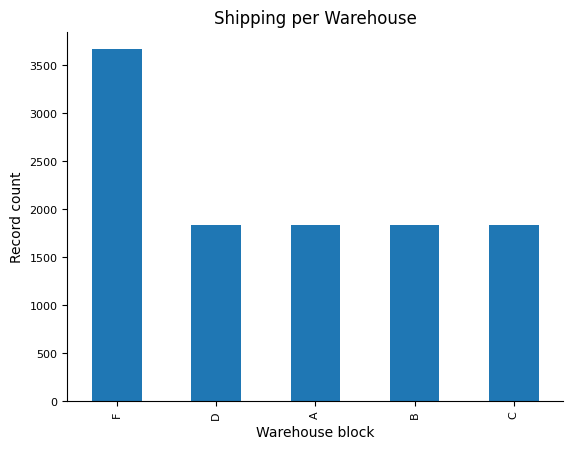

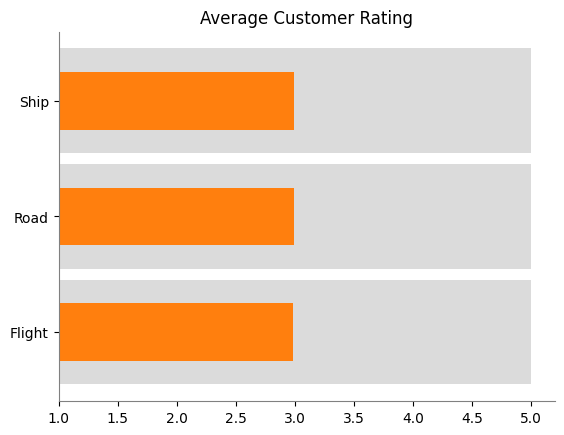

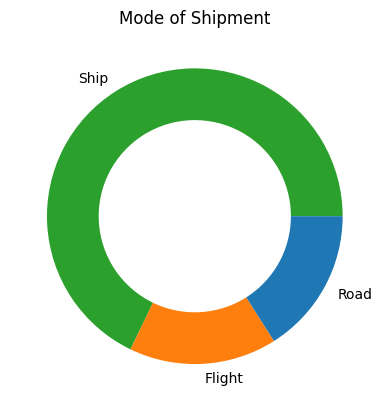

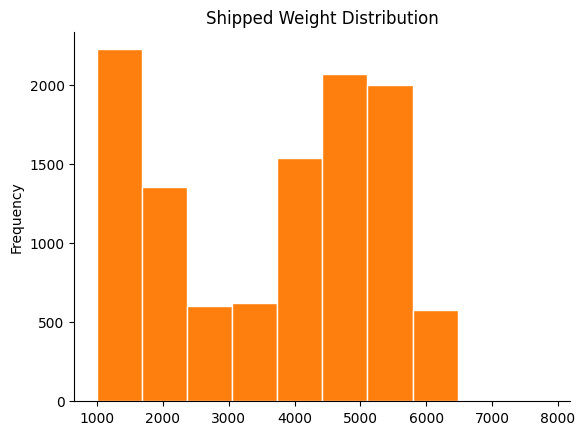

In [9]:
base=cargar_datos()
guardar_imagenes(crear_visual_for_shipping_per_warehouse(base),"shipping_per_warehouse.png")
guardar_imagenes(create_visual_for_average_customer_rating(base),"average_customer_rating.png")
guardar_imagenes(create_visual_for_mode_of_shipment(base),"mode_of_shipment.png")
guardar_imagenes(create_visual_for_weight_distribution(base),"weight_distribution.png")


In [14]:
guardar_html(generar_html_dashboard())